In [1]:
# This is a plane carsh data from 1950 to 2009.

In [2]:
# This is a plane carsh data from 1950 to 2009. We can infer these following queries from the data:
# 1 Is there any location prone to accidents (aka carshes)? This can be validated by the summary provided in the data.
# 2 Is there a particular operator(s) which shows(show) the repeated pattern of crashing 
#   and thus we can raise a question mark about the training guidelines of that typical operator(s)
# 3 Is there any particular route which is prone to crashes. Lot of times regions like bermuda triangle, dragon triangle etc
#   are the reasons for plane crashes.Thus thorough inspection of the geographic areas can mitigate that problem.
# 4 Throwing a light on the deisgn process, technology used in the plane,safety methods available.
#   Again this can be validated by the recorded summary.
# 5 hour can tell us about the visiblity pattern,along with that we can use month to see the average weather associated with the
#   crash and thus any link can be found out using data analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
crash = pd.read_csv("plane_crashes_data.csv")
crash.head(10)

,month,hour,year,location,operator,route,type,aboard,fatalities,summary
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n..."
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...
4,5,20,1950,"Lagens Air Force Base, Azores",Military - U.S. Air Force,Bermuda - England,Boeing B-29,16,16,Crashed while attempting to land after being d...
5,5,10,1950,"Myrtle Beach, South Carolina",Military - U.S. Air Force,NaN,Curtiss C-46D,39,39,"Lost the left aileron after taking off, lost c..."
6,5,17,1950,"Teterboro, New Jersey",Regina Cargo Airlines,NaN,Curtiss C-46F-1-CU,2,1,The cargo plane lost an engine on takeoff and ...
7,6,22,1950,AtlantiOcean off Florida,Westair Transport,San Juan - Wilmington NC,Curtiss C-46-F-1-CU,65,28,Ditched into the Atlanti300 miles east of Melb...
8,6,19,1950,"Near Fonseca, Colombia",New Tribes Mission,"Kingston, Jamacia - Maracaibo, Venezuela",Douglas DC-3-178,15,15,Crashed and burned 19 miles east northeast of ...
9,6,21,1950,Off Bahrain,Air France,Saigon - Paris,Douglas DC-4-1009,52,46,"While making a final approach for Bahrain, the..."


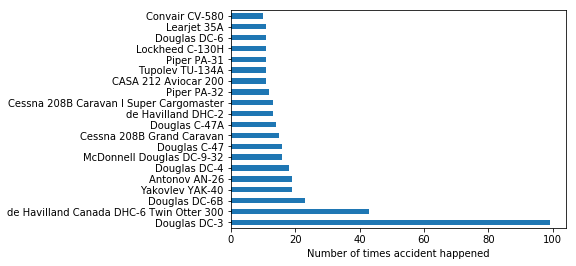

In [38]:
crash["type"].value_counts().head(20).plot(kind="barh")
plt.xlabel("Number of times accident happened")
# Showing the plot between type of plane used and number of crash(es) occured.
# Douglas DC-3 clearly surpassed the number of casualities happened with the total of 99.
# And Otter 300 with total of 43.

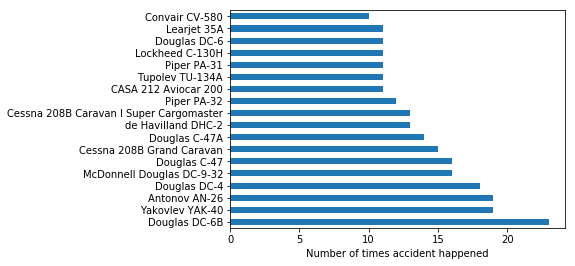

In [39]:
crash["type"].value_counts().head(20)[2:22].plot(kind="barh")
plt.xlabel("Number of times accident happened")

# Getting the top twenty tpes except two leading values.


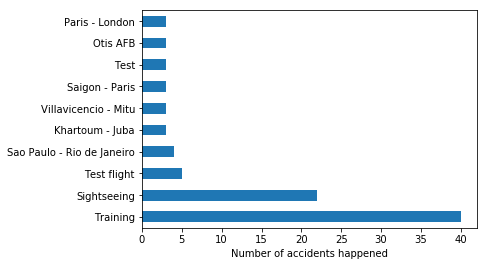

In [57]:
crash["route"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Number of accidents happened")

# Maximum number of accidents happened at Training and Sightseeing.May be poor training facility, flying at low altitude 
# are the reasons behind that.


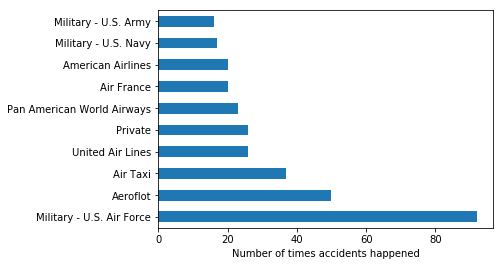

In [72]:
crash["operator"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Number of times accidents happened")
# Military - US Air Force had total of 92 accidents and Aeroflot had 50.

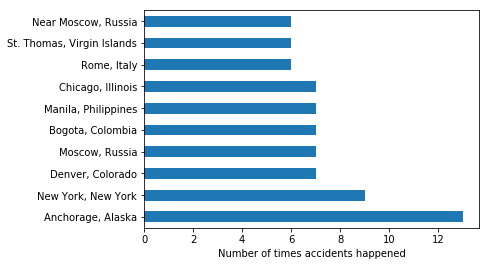

In [75]:
crash["location"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Number of times accidents happened")

In [80]:
op_fat = crash[crash["operator"] == "Military - U.S. Air Force"]
op_fat["fatalities"].sum()
# Total of 2722 deaths occured only by US Air Force 1950 to 2009


2722

In [84]:
ro_fat = crash[crash["route"] == "Training"]
ro_fat["fatalities"].sum()

# Although the crash route of Training happend maximum number of times but the death toll associated witb that 
# crash was only 229 from total of 69937.

229

In [88]:
crash["fatalities"].sum()

69937

In [118]:
locations = crash.location.str.split().tolist()
locations = [x for x in locations if str(x) != "nan"]
countries = []
for i in locations:
    c = i[-1]
    c = c.strip()
    countries.append(c)
#how to strip the countries with >=2 words in their names?
cc = pd.DataFrame(countries)


In [120]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 10 columns):
month         2709 non-null int64
hour          2709 non-null object
year          2709 non-null int64
location      2706 non-null object
operator      2707 non-null object
route         2318 non-null object
type          2708 non-null object
aboard        2709 non-null int64
fatalities    2709 non-null int64
summary       2696 non-null object
dtypes: int64(4), object(6)
memory usage: 211.7+ KB


In [130]:
# route is having too much Null values so we wont be able to analyze the data in a proper way for this.


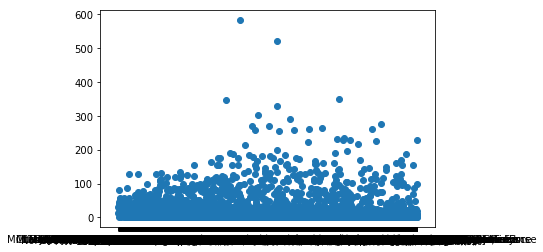

In [138]:
x_axis = crash["operator"]
x1 = np.arange(len(x_axis))
y_axis = crash["fatalities"]
plt.xticks(x1,x_axis)
plt.scatter(x1,y_axis)
plt.show()

In [178]:

# Reasons for crashes:
# 1 Poor Weather
# 2 Technical Fault
# 3 Low Altitude
# 4 Poor communication with the traffic control unit
# These above mentioned factors caused 69937 deaths.
